Library

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

We shall study the dataset Aircraft Wildlife Strikes. The dataset contains a record of each reported wildlife
strike of a military, commercial, or civil aircraft between 1990 and 2015. Each row contains the incident date, aircraft
operator, aircraft make and model, engine make and model, airport name and location, species name and quantity,
and aircraft damage.

Import the dataset

In [46]:
Aircraft_Wildlife_Strikes = pd.read_csv("strikes.csv")

In [47]:
Aircraft_Wildlife_Strikes

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,100000,AAL,AMERICAN AIRLINES,B-727,148,10.0,34.0,10.0,A,4.0,...,Deleted,Deleted,1992-05-14 00:00:00,FAA Form 5200-7,Pilot,NaN,NaN,1996-03-14 00:00:00,0,0
1,100001,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
2,100002,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
3,100003,UAL,UNITED AIRLINES,B-757-200,148,26.0,34.0,40.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
4,100004,UAL,UNITED AIRLINES,A-320,04A,3.0,23.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,17458,MIL,MILITARY,C-135,148,NaN,NaN,NaN,A,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
74,17459,MIL,MILITARY,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
75,17460,MIL,MILITARY,C-40,148,NaN,22.0,NaN,A,4.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
76,17461,MIL,MILITARY,T-38,665,NaN,22.0,62.0,A,2.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,1


Exploration of the data

Data set shape:

In [48]:
Aircraft_Wildlife_Strikes.shape

(78, 94)

In [49]:
Aircraft_Wildlife_Strikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 94 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INDEX_NR               78 non-null     int64  
 1   OPID                   78 non-null     object 
 2   OPERATOR               78 non-null     object 
 3   ATYPE                  78 non-null     object 
 4   AMA                    63 non-null     object 
 5   AMO                    59 non-null     float64
 6   EMA                    58 non-null     float64
 7   EMO                    57 non-null     float64
 8   AC_CLASS               63 non-null     object 
 9   AC_MASS                61 non-null     float64
 10  NUM_ENGS               61 non-null     float64
 11  TYPE_ENG               61 non-null     object 
 12  ENG_1_POS              61 non-null     float64
 13  ENG_2_POS              60 non-null     float64
 14  ENG_3_POS              6 non-null      float64
 15  ENG_4_PO

In [50]:
Aircraft_Wildlife_Strikes.head(4)

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,100000,AAL,AMERICAN AIRLINES,B-727,148,10.0,34.0,10.0,A,4.0,...,Deleted,Deleted,1992-05-14 00:00:00,FAA Form 5200-7,Pilot,NaN,NaN,1996-03-14 00:00:00,0,0
1,100001,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
2,100002,UAL,UNITED AIRLINES,B-737-300,148,24.0,10.0,1.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0
3,100003,UAL,UNITED AIRLINES,B-757-200,148,26.0,34.0,40.0,A,4.0,...,Deleted,Deleted,NaN,Air Transport Report,Air Transport Operations,NaN,NaN,2007-12-20 00:00:00,0,0


In [51]:
Aircraft_Wildlife_Strikes.tail(5)

,INDEX_NR,OPID,OPERATOR,ATYPE,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
73,17458,MIL,MILITARY,C-135,148,NaN,NaN,NaN,A,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
74,17459,MIL,MILITARY,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
75,17460,MIL,MILITARY,C-40,148,NaN,22.0,NaN,A,4.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0
76,17461,MIL,MILITARY,T-38,665,NaN,22.0,62.0,A,2.0,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,1
77,17462,MIL,MILITARY,H-60,813,NaN,NaN,NaN,B,NaN,...,Deleted,Deleted,NaN,BASH,NaN,NaN,NaN,2014-09-18 00:00:00,0,0


Display the column name

In [52]:
for col in Aircraft_Wildlife_Strikes.columns:
    print(col)

INDEX_NR
OPID
OPERATOR
ATYPE
AMA
AMO
EMA
EMO
AC_CLASS
AC_MASS
NUM_ENGS
TYPE_ENG
ENG_1_POS
ENG_2_POS
ENG_3_POS
ENG_4_POS
REG
FLT
REMAINS_COLLECTED
REMAINS_SENT
INCIDENT_DATE
INCIDENT_MONTH
INCIDENT_YEAR
TIME_OF_DAY
TIME
AIRPORT_ID
AIRPORT
STATE
FAAREGION
ENROUTE
RUNWAY
LOCATION
HEIGHT
SPEED
DISTANCE
PHASE_OF_FLT
DAMAGE
STR_RAD
DAM_RAD
STR_WINDSHLD
DAM_WINDSHLD
STR_NOSE
DAM_NOSE
STR_ENG1
DAM_ENG1
STR_ENG2
DAM_ENG2
STR_ENG3
DAM_ENG3
STR_ENG4
DAM_ENG4
INGESTED
STR_PROP
DAM_PROP
STR_WING_ROT
DAM_WING_ROT
STR_FUSE
DAM_FUSE
STR_LG
DAM_LG
STR_TAIL
DAM_TAIL
STR_LGHTS
DAM_LGHTS
STR_OTHER
DAM_OTHER
OTHER_SPECIFY
EFFECT
EFFECT_OTHER
SKY
PRECIP
SPECIES_ID
SPECIES
BIRDS_SEEN
BIRDS_STRUCK
SIZE
WARNED
COMMENTS
REMARKS
AOS
COST_REPAIRS
COST_OTHER
COST_REPAIRS_INFL_ADJ
COST_OTHER_INFL_ADJ
REPORTED_NAME
REPORTED_TITLE
REPORTED_DATE
SOURCE
PERSON
NR_INJURIES
NR_FATALITIES
LUPDATE
TRANSFER
INDICATED_DAMAGE


Get the number of occurances of birdstrike for each airline operator

In [53]:
operator = Aircraft_Wildlife_Strikes.groupby("OPERATOR")["INDICATED_DAMAGE"]
operator.get_group('AMERICAN AIRLINES')

0     0
6     0
11    0
17    0
21    0
33    0
68    1
69    0
70    0
Name: INDICATED_DAMAGE, dtype: int64

In [60]:
# operator_count = Aircraft_Wildlife_Strikes.groupby("OPERATOR")["INDICATED_DAMAGE"].value_counts()
# operator_count

OPERATOR                        INDICATED_DAMAGE
ABX AIR                         0                    2
AIR MIDWEST                     1                    1
AIRTRAN AIRWAYS                 1                    1
AMERICA WEST AIRLINES           0                    1
AMERICAN AIRLINES               0                    8
                                1                    1
AMERICAN EAGLE AIRLINES         1                    1
ATLANTIC SOUTHEAST              0                    2
BUSINESS                        0                    3
CAPE AIR                        0                    1
CHAUTAUQUA AIRLINES             0                    1
COMAIR AIRLINES                 0                    1
CONTINENTAL AIRLINES            0                    2
ENDEAVOR AIR                    0                    1
EXPRESSJET (CONTINENTAL EXPRS)  0                    1
EXPRESSJET AIRLINES             0                    2
FEDEX EXPRESS                   0                    3
HORIZON AIR     

In [82]:
operator_count = []
operators = []
for operator_name in Aircraft_Wildlife_Strikes["OPERATOR"].unique():
    sum = Aircraft_Wildlife_Strikes[Aircraft_Wildlife_Strikes["OPERATOR"] == operator_name]["INDICATED_DAMAGE"].sum()
    operator_count.append(sum)
    operators.append(operator_name)
operator_count = np.array(operator_count)

In [71]:
# operator_count = Aircraft_Wildlife_Strikes.groupby("OPERATOR")["INDICATED_DAMAGE"].sum()
# operator_count

OPERATOR
ABX AIR                           0
AIR MIDWEST                       1
AIRTRAN AIRWAYS                   1
AMERICA WEST AIRLINES             0
AMERICAN AIRLINES                 1
AMERICAN EAGLE AIRLINES           1
ATLANTIC SOUTHEAST                0
BUSINESS                          0
CAPE AIR                          0
CHAUTAUQUA AIRLINES               0
COMAIR AIRLINES                   0
CONTINENTAL AIRLINES              0
ENDEAVOR AIR                      0
EXPRESSJET (CONTINENTAL EXPRS)    0
EXPRESSJET AIRLINES               0
FEDEX EXPRESS                     0
HORIZON AIR                       0
MESA AIRLINES                     0
MILITARY                          1
PINNACLE                          1
SKYWEST AIRLINES                  1
SOUTHWEST AIRLINES                1
SUN COUNTRY AIRLINES              0
UNITED AIRLINES                   1
UNKNOWN                           0
UPS AIRLINES                      1
WINGS WEST                        0
Name: INDICATED_DAM

Convert ```operator_count``` to numpy array

In [79]:
operator_count.columns()

AttributeError: 'Series' object has no attribute 'columns'

In [72]:
operator_count = operator_count.values()
operator_count

TypeError: 'numpy.ndarray' object is not callable

In [62]:
operators = Aircraft_Wildlife_Strikes["OPERATOR"]

Plot

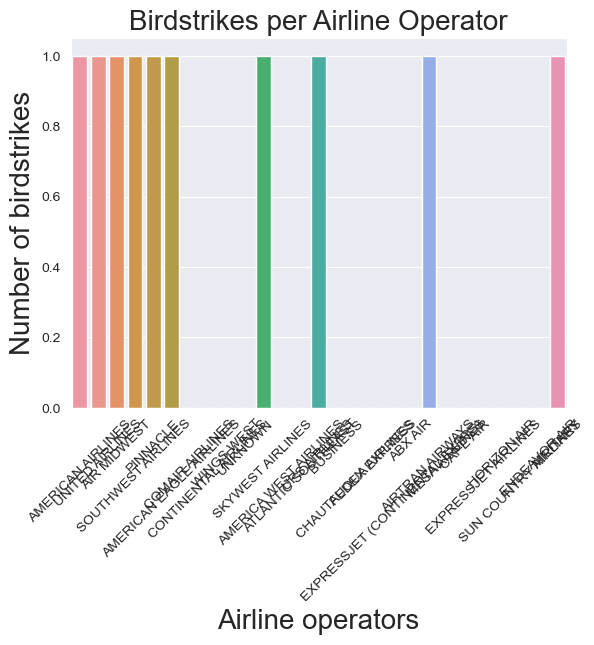

In [84]:
paired_palette = sns.color_palette("colorblind")
sns.set_palette(paired_palette, 10)
plt.xticks(rotation=45)
plt.xlabel("Airline operators", fontsize=20)
plt.ylabel("Number of birdstrikes", fontsize=20)
plt.title("Birdstrikes per Airline Operator", fontsize=20)
barplot = sns.barplot(x=operators, y=operator_count)

Perform a one-way chi square test to see if states are evenly distributed

In [66]:
state_count = Aircraft_Wildlife_Strikes.groupby("STATE").value_counts("")
state_count

STATE
AL     1
AR     1
CA     5
CO     5
DC     2
FL     4
HI     1
IL     3
IN     1
KY     3
LA     3
MN     2
MO     2
MT     1
NC     2
NE     2
NJ     3
NM     1
NY     5
OH     1
OK     1
TN     1
TX    12
UT     2
VA     1
VI     1
WA     1
WI     1
dtype: int64

In [85]:
import scipy

scipy.stats.chisquare(Aircraft_Wildlife_Strikes["STATE"].value_counts())

Power_divergenceResult(statistic=58.82352941176469, pvalue=0.0003754426228260402)